In [107]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


In [108]:
data1=pd.read_csv("/kaggle/input/pima-indians-diabetes-database/diabetes.csv")

In [109]:
# Having a look at the data
data1.head(5)
data1.columns
data1[data1.Age<50]
data1.iloc[:5,]
data1.groupby([data1['Pregnancies'],data1['Age']]).mean()
data1['Glucose'].groupby(data1['Outcome']).mean()
#data1['Insulin'].groupby(data1['Outcome']).mean()
#data1['Pregnancies'].groupby(data1['Outcome']).mean()
#data1['BloodPressure'].groupby(data1['Outcome']).mean()
#data1['SkinThickness'].groupby(data1['Outcome']).mean()

Outcome
0    109.980000
1    141.257463
Name: Glucose, dtype: float64

In [110]:
#checking for NA
data1.isnull().values.any()
data1.head()
from sklearn.neighbors import LocalOutlierFactor
lof =LocalOutlierFactor(n_neighbors= 10)
lof.fit_predict(data1)
data1_scores = lof.negative_outlier_factor_
np.sort(data1_scores)[0:30]
for feature in data1:

    Q1 = data1[feature].quantile(0.25)
    Q3 = data1[feature].quantile(0.75)
    IQR = Q3-Q1
    upper = Q3 + 1.5*IQR
    lower = Q1 - 1.5*IQR

    if data1[(data1[feature] > upper) | (data1[feature] < lower)].any(axis=None):
        print(feature,"yes")
        print(data1[(data1[feature] > upper) | (data1[feature] < lower)].shape[0])
        print("lower",lower,"\nupper",upper)
        data1.loc[data1[feature] > upper,feature] = upper
    else:
        print(feature, "no")
        

Pregnancies yes
4
lower -6.5 
upper 13.5
Glucose yes
5
lower 37.125 
upper 202.125
BloodPressure yes
45
lower 35.0 
upper 107.0
SkinThickness yes
1
lower -48.0 
upper 80.0
Insulin yes
34
lower -190.875 
upper 318.125
BMI yes
19
lower 13.35 
upper 50.550000000000004
DiabetesPedigreeFunction yes
29
lower -0.32999999999999996 
upper 1.2
Age yes
9
lower -1.5 
upper 66.5
Outcome no


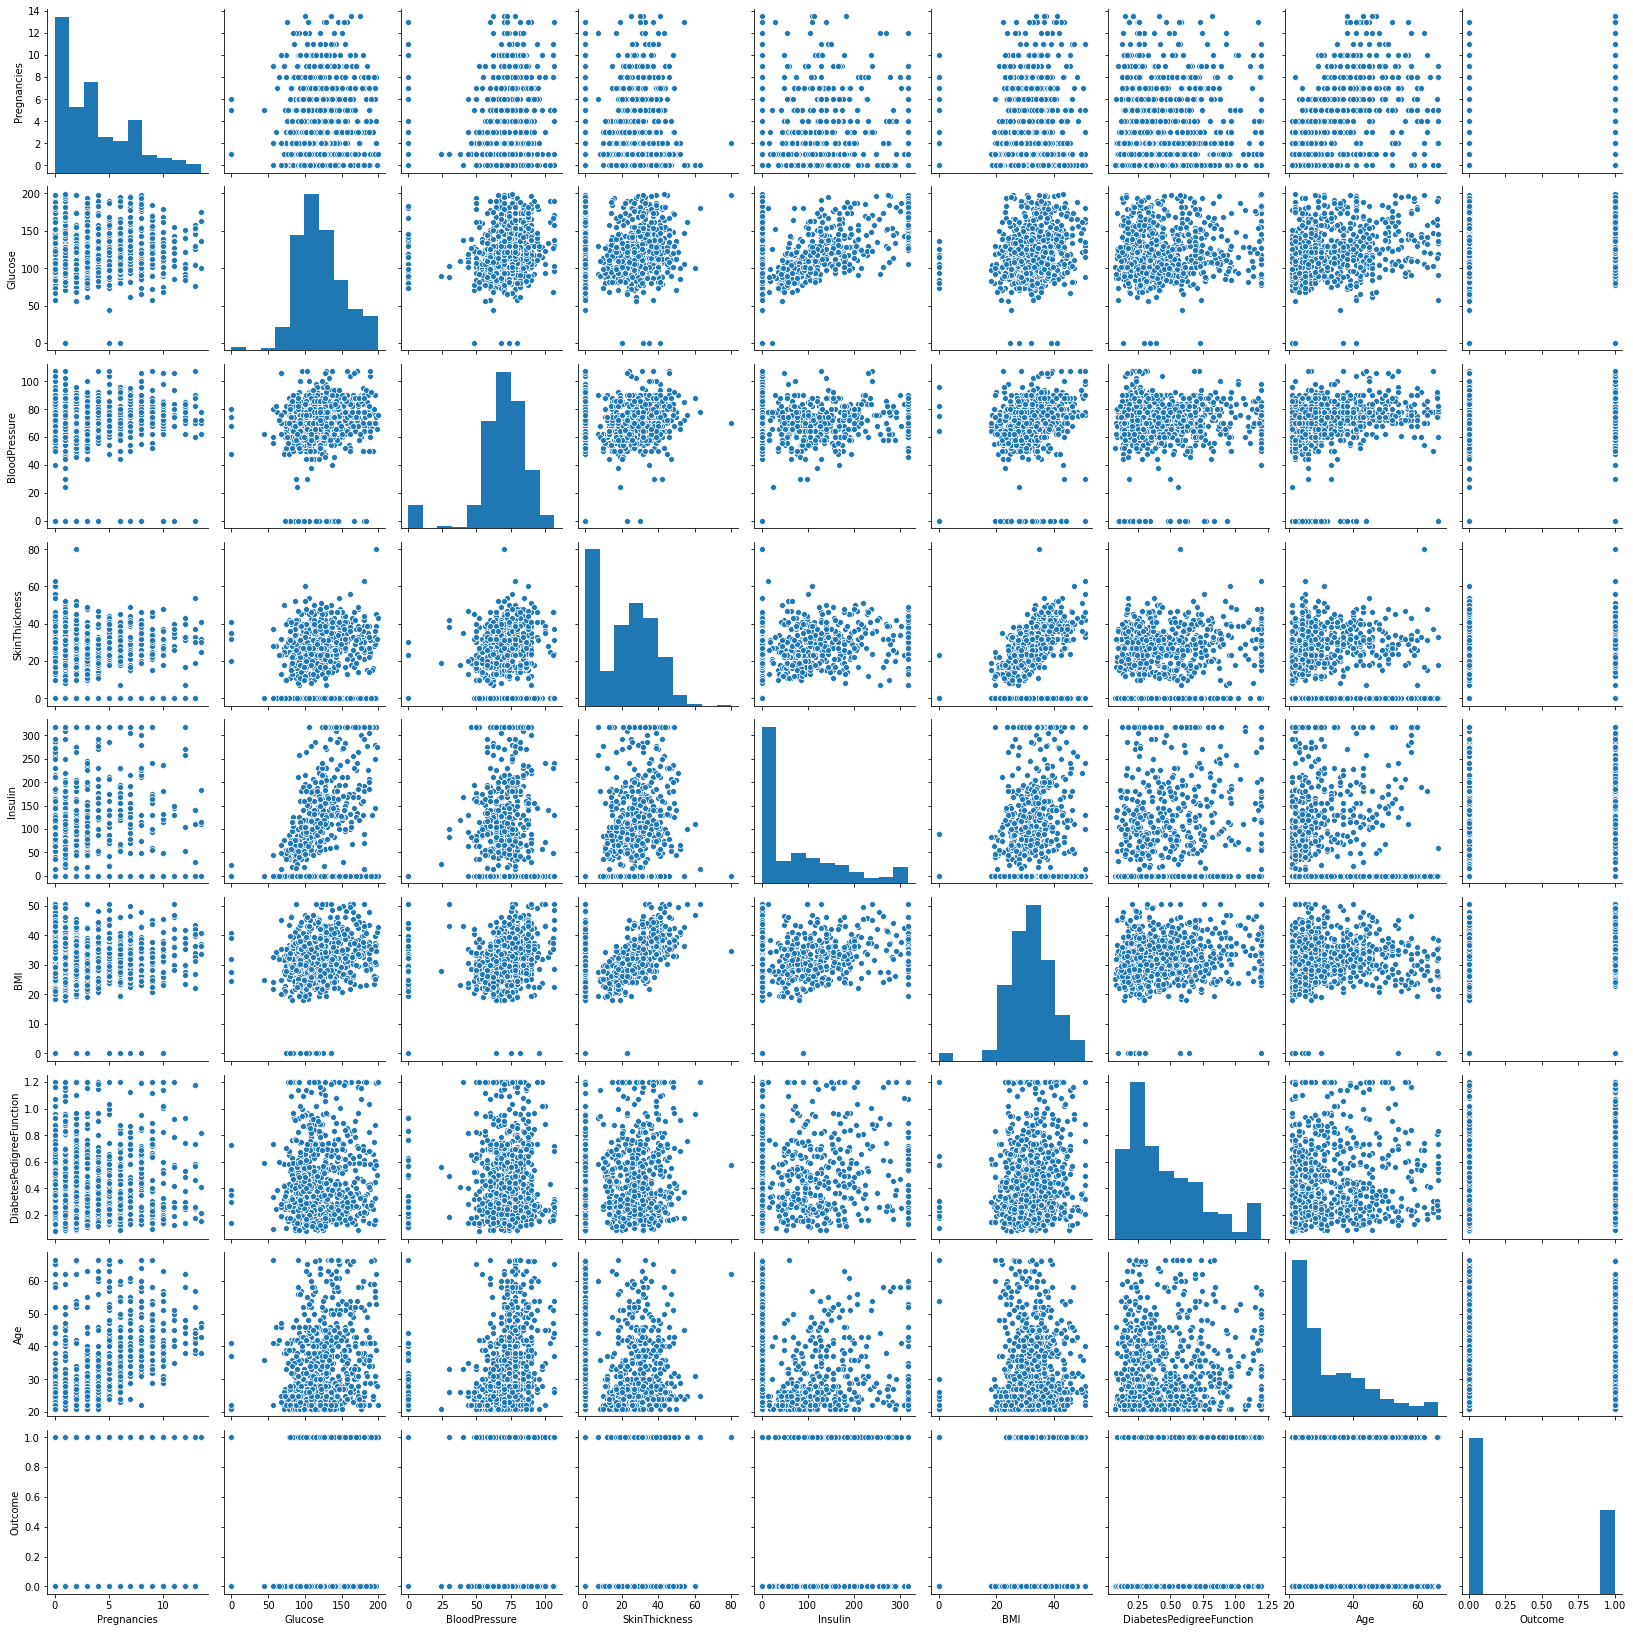

In [111]:
# pairwise scatter with seaborn
sns.pairplot(pd.DataFrame(data1)) 
plt.show()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

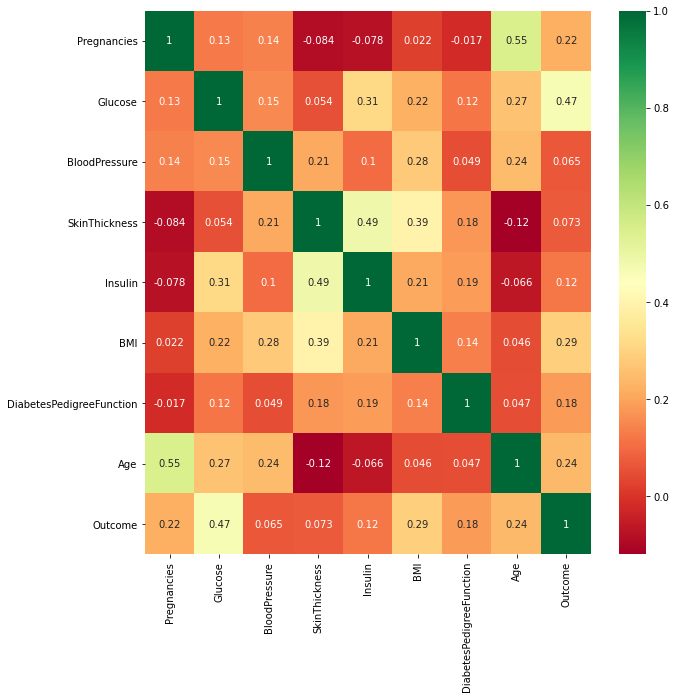

In [112]:
#correlation matrix
import seaborn as sns
corrmat = data1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(data1[top_corr_features].corr(),annot=True,cmap="RdYlGn")
X=data1[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
Y=data1[['Outcome']]
Y=np.ravel(Y)
X.isnull().sum()

In [113]:
#Preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
rescaled_X=scaler.fit_transform(X)
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler().fit(X)
standardize_X=scalar.transform(X)

#Splitting into training and target
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(standardize_X,Y, test_size=0.25, random_state=0)

#Logistic modeling
from sklearn.linear_model import LogisticRegression
logistic_reg = LogisticRegression()
logistic_reg.fit(x_train, y_train)
predictions = logistic_reg.predict(x_test)

# Use score method to get accuracy of model
score = logistic_reg.score(x_test, y_test)
print(score)

0.8020833333333334


Text(0.5, 1.0, 'Accuracy Score: 0.8020833333333334')

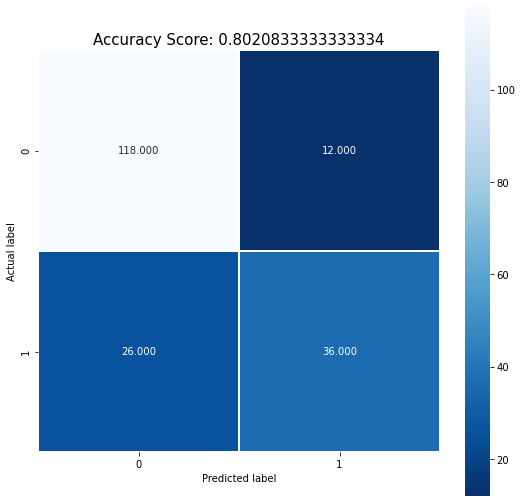

In [114]:
#printing confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
#print(cm)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

In [115]:
#Logistic modeling with regularistaion

from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score
# create the logistic regression model
logistic_reg = RidgeClassifier()
# fit the model on the training set 
logistic_reg.fit(x_train, y_train)
# make predictions on the test set 
predictions = logistic_reg.predict(x_test)
# evaluate the model performance using accuracy metric
print("Accuracy: %.2f" % accuracy_score(y_test, predictions))


Accuracy: 0.80


In [116]:
# Support vector machine classification
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
# create the model
svc_model = SVC(kernel='linear',gamma='scale')
# fit the model on the training set 
svc_model.fit(x_train, y_train)
# make predictions on the test set 
predictions = svc_model.predict(x_test)
# evaluate the model performance using accuracy metric 
print("Accuracy: %.2f" % accuracy_score(y_test, predictions))

Accuracy: 0.80


In [117]:
#CART
from sklearn.tree import DecisionTreeClassifier
# create the model
tree_classifier = DecisionTreeClassifier()
# fit the model on the training set 
tree_classifier.fit(x_train, y_train)
# make predictions on the test set 
predictions = tree_classifier.predict(x_test)
# evaluate the model performance using accuracy metric 
print("Accuracy: %.2f" % accuracy_score(y_test, predictions))

Accuracy: 0.73


In [118]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
# create the model
rf_classifier = RandomForestClassifier(random_state=0,n_estimators=576,max_depth=100,max_features='auto')
# fit the model on the training set 
rf_classifier.fit(x_train, y_train)
# make predictions on the test set 
predictions = rf_classifier.predict(x_test)
# evaluate the model performance using accuracy metric 
print("Accuracy: %.2f" % accuracy_score(y_test, predictions))

Accuracy: 0.79


In [119]:
#SGD (Stochastic Gradient Descent)
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
# create the model
sgb_classifier = GradientBoostingClassifier(random_state=0)
# fit the model on the training set 
sgb_classifier.fit(x_train, y_train)
# make predictions on the test set 
predictions = sgb_classifier.predict(x_test)
# evaluate the model performance using accuracy metric 
print("Accuracy: %.2f" % accuracy_score(y_test, predictions))


Accuracy: 0.79


In [120]:
#XGBoost
from xgboost import XGBClassifier
# create the model 
xgboost_classifier = XGBClassifier()
# fit the model on the training set 
xgboost_classifier.fit(x_train, y_train)
# make predictions on the test set
predictions = xgboost_classifier.predict(x_test)
# evaluate the model performance using accuracy metric 
print("Accuracy: %.2f" % accuracy_score(y_test, predictions))

Accuracy: 0.79


In [121]:
#Replacing zeros with maens to improve model performance and data preprocessing
filt1=(data1['Outcome']==0)&(data1['Glucose']==0)
filt2=(data1['Outcome']==1)&(data1['Glucose']==0)
data1.loc[filt1,'Glucose']=110
data1.loc[filt2,'Glucose']=141

filt1=(data1['Outcome']==0)&(data1['BloodPressure']==0)
filt2=(data1['Outcome']==1)&(data1['BloodPressure']==0)
data1.loc[filt1,'BloodPressure']=70
data1.loc[filt2,'BloodPressure']=75

filt1=(data1['Outcome']==0)&(data1['SkinThickness']==0)
filt2=(data1['Outcome']==1)&(data1['SkinThickness']==0)
data1.loc[filt1,'SkinThickness']=25
data1.loc[filt2,'SkinThickness']= 29

filt1=(data1['Outcome']==0)&(data1['Insulin']==0)
filt2=(data1['Outcome']==1)&(data1['Insulin']==0)
data1.loc[filt1,'Insulin']=97
data1.loc[filt2,'Insulin']=141

filt1=(data1['Outcome']==0)&(data1['BMI']==0)
filt2=(data1['Outcome']==1)&(data1['BMI']==0)
data1.loc[filt1,'BMI']=30
data1.loc[filt2,'BMI']=37

from sklearn.preprocessing import MinMaxScaler
df_modified=data1.copy()
df_modified.drop('Outcome',axis=1,inplace=True)
cols=df_modified.columns
scaler=MinMaxScaler()
df_modified=pd.DataFrame(scaler.fit_transform(df_modified))
df_modified.columns=cols
df_modified['Outcome']=data1['Outcome']
df_modified['Outcome'].replace({0:'Non-Diabetic',1:'Diabetic'},inplace=True)
df_modified

In [122]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.837240,3.344157,0.000,1.00000,3.0000,6.00000,13.500
Glucose,768.0,121.691406,30.460693,44.000,99.75000,117.0000,141.00000,199.000
BloodPressure,768.0,72.356771,11.967919,24.000,64.00000,72.0000,80.00000,107.000
SkinThickness,768.0,28.359375,8.762907,7.000,25.00000,28.0000,32.00000,80.000
Insulin,768.0,128.795898,63.642376,14.000,97.00000,100.0000,141.00000,318.125
BMI,768.0,32.381771,6.685069,18.200,27.50000,32.0500,36.60000,50.550
DiabetesPedigreeFunction,768.0,0.458914,0.285596,0.078,0.24375,0.3725,0.62625,1.200
Age,768.0,33.199870,11.628404,21.000,24.00000,29.0000,41.00000,66.500
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.000


In [123]:

#model building

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score

xtrain,xtest,ytrain,ytest=train_test_split(data1[cols],data1['Outcome'],test_size=0.33,random_state=0)


#RandomForest
from sklearn.ensemble import RandomForestClassifier
clf1=RandomForestClassifier()
clf1.fit(xtrain,ytrain)
predictions1=clf1.predict(xtest)
probabilities=clf1.predict_proba(xtest)
importance1=list(zip(xtrain.columns,clf1.feature_importances_))

print('accuracy'+' '+'='+' '+str(accuracy_score(ytest,predictions1)))
print('ROC score'+' '+'='+' '+str(roc_auc_score(ytest,probabilities[:,1])))
print('f1 score'+' '+'='+' '+str(f1_score(ytest,predictions1)))
print('recall score'+' '+'='+' '+str(recall_score(ytest,predictions1)))
print('precision score'+' '+'='+' '+str(precision_score(ytest,predictions1)))
print()
print()
print("Feature Importances")
print(importance1)
print()
cm = metrics.confusion_matrix(ytest, predictions1)
print(cm)

accuracy = 0.9015748031496063
ROC score = 0.9604691876750701
f1 score = 0.8502994011976047
recall score = 0.8452380952380952
precision score = 0.8554216867469879


Feature Importances
[('Pregnancies', 0.05573737751641574), ('Glucose', 0.16639546567086155), ('BloodPressure', 0.05241007474627594), ('SkinThickness', 0.13715610413066903), ('Insulin', 0.3266295921089231), ('BMI', 0.08751678361854018), ('DiabetesPedigreeFunction', 0.07173077527219833), ('Age', 0.10242382693611615)]

[[158  12]
 [ 13  71]]


In [124]:
#Gradient boosted Classifier

from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

clf2= GradientBoostingClassifier()
clf2.fit(xtrain,ytrain)
predictions2=clf2.predict(xtest)
probabilities1=clf2.predict_proba(xtest)
importance2=list(zip(xtrain.columns,clf2.feature_importances_))

print('accuracy'+' '+'='+' '+str(accuracy_score(ytest,predictions2)))
print('ROC score'+' '+'='+' '+str(roc_auc_score(ytest,probabilities1[:,1])))
print('f1 score'+' '+'='+' '+str(f1_score(ytest,predictions2)))
print('recall score'+' '+'='+' '+str(recall_score(ytest,predictions2)))
print('precision score'+' '+'='+' '+str(precision_score(ytest,predictions2)))
print()
print()
print("Feature Importances")
print(importance2)
print()
cm = metrics.confusion_matrix(ytest, predictions2)
print(cm)

accuracy = 0.9133858267716536
ROC score = 0.968767507002801
f1 score = 0.8658536585365854
recall score = 0.8452380952380952
precision score = 0.8875


Feature Importances
[('Pregnancies', 0.019177860254492085), ('Glucose', 0.126468037788267), ('BloodPressure', 0.009543278312842959), ('SkinThickness', 0.02589743598770952), ('Insulin', 0.6335258712750574), ('BMI', 0.060184705011419974), ('DiabetesPedigreeFunction', 0.03284504016478312), ('Age', 0.09235777120542778)]

[[161   9]
 [ 13  71]]
